Evaluation Project - 4

# Global Power Plant Database Project

## Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

## Key attributes of the database

The database includes the following indicators:

1.`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]  
2.`country_long` (text): longer form of the country designation  
3.`name` (text): name or title of the power plant, generally in Romanized form  
4.`gppd_idnr` (text): 10 or 12 character identifier for the power plant  
5.`capacity_mw` (number): electrical generating capacity in megawatts  
6.`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
7.`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)  
8.`primary_fuel` (text): energy source used in primary electricity generation or export  
9.`other_fuel1` (text): energy source used in electricity generation or export  
10.`other_fuel2` (text): energy source used in electricity generation or export  
11.`other_fuel3` (text): energy source used in electricity generation or export  
12.`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available  
13.`owner` (text): majority shareholder of the power plant, generally in Romanized form  
14.`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form  
15.`url` (text): web document corresponding to the `source` field  
16.`geolocation_source` (text): attribution for geolocation information  
17.`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.  
18.`year_of_capacity_data` (number): year the capacity information was reported  
19.`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013  
20.`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014  
21.`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015  
22.`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016  
23.`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017  
24.`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018  
25.`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019  
26.`generation_data_source` (text): attribution for the reported generation information  
27.`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013  
28.`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014  
29.`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015  
30`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016  
31.`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017  
32.`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 
33.`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014  
34.`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015 
35.`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016 
36.`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In this dataset we need to make two predictions:  

`Primary Fuel ` 

`capacity_mw ` 

First we will predict capacity_mw prediction, since the target variable `capacity_mw` has continuous data so it is a `Regression problem`. After this will move to `Primary Fuel` prediction which is `Classiication problem`.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_gp=pd.read_csv("Global_Power_Plant_Database.csv")
df_gp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# First 10 rows
df_gp.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
# Last 10 rows
df_gp.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
897,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,2019.0,NaN,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,NaN,Central Electricity Authority,NaN
900,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,2019.0,NaN,0.00000,0.000000,0.000000,NaN,0.00000,NaN,Central Electricity Authority,NaN
902,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.50000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Sample
df_gp.sample(4)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
197,IND,India,Dhank - Aravali Solar Power Plant,WRI1026135,5.00,21.7766,70.0773,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,IND,India,PAPANASAM,IND0000324,32.00,8.7065,77.3627,Hydro,NaN,NaN,...,2019.0,NaN,117.63885,115.98715,66.2073,114.7036,120.30545,NaN,Central Electricity Authority,NaN
68,IND,India,BEL Chikhalhol Wind Farm,WRI1026664,20.00,17.3816,74.5345,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,IND,India,DADRI GT,IND0000089,829.78,28.5932,77.6101,Gas,Oil,NaN,...,2019.0,NaN,2462.00000,2924.00000,2178.0000,1575.0000,1605.00000,NaN,Central Electricity Authority,NaN


In [6]:
df_gp.shape

(907, 27)

This dataset contains `907` rows and `27` columns.

# Preprocessing & EDA

In [7]:
# Column Names
df_gp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df_gp.shape

(907, 27)

In [9]:
# Column Data Types
df_gp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see the dataset contains object and float datatype columns.

In [10]:
# Checking for null values
df_gp.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
# Sum of null values
df_gp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are null values present in most of the columns in this dataset.

<AxesSubplot:>

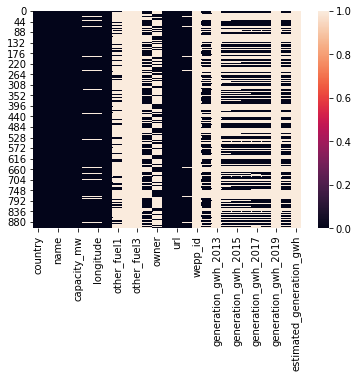

In [12]:
# Visualizing the null values
sns.heatmap(df_gp.isnull())

In [13]:
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As seen above, `other_fuel3`,`wepp_id`,`generation_gwh_2013`,`generation_gwh_2019` & `estimated_generation_gwh` have all NaN values, which leaves them to be of no use to us in building our model. So we shall drop these columns.

Also, `other_fuel2` has only one not-nbull value which would also not contribute much towards our model so we shall drop this column as well.

In [14]:
# Droping unnecessary columns
df_gp = df_gp.drop(["other_fuel3"],axis=1)
df_gp = df_gp.drop(["wepp_id"],axis=1)
df_gp = df_gp.drop(["generation_gwh_2013"],axis=1)
df_gp = df_gp.drop(["generation_gwh_2019"],axis=1)
df_gp = df_gp.drop(["estimated_generation_gwh"],axis=1)
df_gp = df_gp.drop(["other_fuel2"],axis=1)

In [15]:
# Checking unique values of each column
df_gp.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In the columns, `country`, `country_long`, `year_of_capacity_data` and `generation_data_source` there is only one unique count which means all the values of the column are same, so no need to keep all these columns unnecessarily.

In [16]:
# Droping unnecessary columns
df_gp = df_gp.drop(["country"],axis=1)
df_gp = df_gp.drop(["country_long"],axis=1)
df_gp = df_gp.drop(["year_of_capacity_data"],axis=1)
df_gp = df_gp.drop(["generation_data_source"],axis=1)

In [17]:
# Printing the data set after removing columns
df_gp.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [18]:
# Value counts of each column.
for i in df_gp.columns:
        print(df_gp[i].value_counts())
        print('-----------------------------------------------------')

DEHAR                                                          1
Roaring 40s Wind Farms (Khandke) Private Limited - Phase II    1
I.B.VALLEY                                                     1
BHATGARH                                                       1
Shree Southern Wind Farm                                       1
                                                              ..
Nokh - GGEL Solar Power Plant                                  1
MUNDRA UMPP                                                    1
PORINGALKUTTU L                                                1
Jangi village wind farm                                        1
JAYPEE SIDHI CEMENT                                            1
Name: name, Length: 907, dtype: int64
-----------------------------------------------------
WRI1020006    1
IND0000342    1
WRI1026775    1
IND0000227    1
IND0000200    1
             ..
IND0000129    1
IND0000474    1
IND0000254    1
WRI1026657    1
WRI1026212    1
Name: gppd_idnr, 

`Name`,`gppd_idnr`,`url`,`owner` columns have more than 95 % all the unique values.And these columns will not contribute much in model training & testing.So lets drop these columns.

In [19]:
# Droping unnecessary columns
df_gp = df_gp.drop(["name"],axis=1)
df_gp = df_gp.drop(["gppd_idnr"],axis=1)
df_gp = df_gp.drop(["url"],axis=1)
df_gp = df_gp.drop(["owner"],axis=1)

In [20]:
# Printing the data set after removing columns
df_gp.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [21]:
df_gp.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

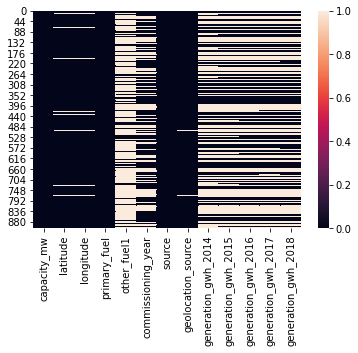

In [22]:
sns.heatmap(df_gp.isnull())

In [23]:
df_gp.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

# Treating null values using imputation techniques.

In [24]:
df_gp.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

The `latitude` column has numerical data and has no skewness so we can use `mean method` to fill the null values.

In [25]:
df_gp['latitude'].mean()

21.19791811846691

In [26]:
# Filling missing values in lattitude using mean
df_gp["latitude"] = df_gp["latitude"].fillna(df_gp["latitude"].mean())

The columns `longitude`, `commissioning year`, `generation_gwh_2014`, `generation_gwh_2015`, `generation_gwh_2016`, `generation_gwh_2017` and `generation_gwh_2018` are numerical type and have high skewness so will replace null values using `median method`.

In [27]:
# Filling null values using their median values
df_gp["longitude"] = df_gp["longitude"].fillna(df_gp["longitude"].median())
df_gp["commissioning_year"] = df_gp["commissioning_year"].fillna(df_gp["commissioning_year"].median())
df_gp["generation_gwh_2014"] = df_gp["generation_gwh_2014"].fillna(df_gp["generation_gwh_2014"].median())
df_gp["generation_gwh_2015"] = df_gp["generation_gwh_2015"].fillna(df_gp["generation_gwh_2015"].median())
df_gp["generation_gwh_2016"] = df_gp["generation_gwh_2016"].fillna(df_gp["generation_gwh_2016"].median())
df_gp["generation_gwh_2017"] = df_gp["generation_gwh_2017"].fillna(df_gp["generation_gwh_2017"].median())
df_gp["generation_gwh_2018"] = df_gp["generation_gwh_2018"].fillna(df_gp["generation_gwh_2018"].median())

The columns `other_fuel1` and `geolocation_source` have categorical data so we can fill the null values using `mode method`.

In [28]:
df_gp["other_fuel1"].mode()

0    Oil
dtype: object

In [29]:
df_gp["geolocation_source"].mode()

0    WRI
dtype: object

In [30]:
# Filling null values using their mode values
df_gp["other_fuel1"] = df_gp["other_fuel1"].fillna(df_gp["other_fuel1"].mode()[0])
df_gp["geolocation_source"] = df_gp["geolocation_source"].fillna(df_gp["geolocation_source"].mode()[0])

In [31]:
df_gp.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

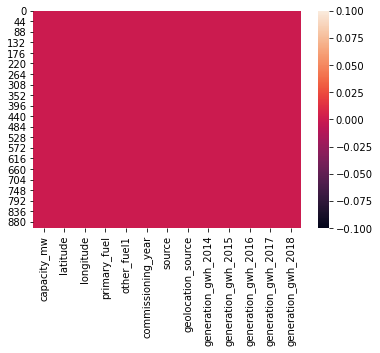

In [32]:
sns.heatmap(df_gp.isnull())

We have treated the null values present in the dataset.

# Feature Engineering

In [33]:
# Checking the value counts of commissioning_year
df_gp['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [34]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2019(since no data is provided for 2019)
df_gp["power_plant_age"] = 2019 - df_gp["commissioning_year"]
df_gp.drop(columns=["commissioning_year"], inplace = True)

In [35]:
df_gp

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


In [36]:
# Checking whether capacity_mw contains empty observations
df_gp.loc[df_gp['capacity_mw']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age


No empty observations.

In [37]:
# Checking whether primary_fuel contains empty observations
df_gp.loc[df_gp['primary_fuel']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age


No empty observations.

In [38]:
df_gp.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


In [39]:
# Checking unique values of target column
df_gp['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [40]:
# Checking unique values of target column
df_gp['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

# Data Visualization

In [41]:
# checking for categorical columns
categorical=[]
for i in df_gp.dtypes.index:
    if df_gp.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [42]:
# checking for numerical columns
numerical=[]
for i in df_gp.dtypes.index:
    if df_gp.dtypes[i]!='object':
        numerical.append(i)
print(numerical)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'power_plant_age']


In [43]:
df_gp.nunique()

capacity_mw            361
latitude               837
longitude              827
primary_fuel             8
other_fuel1              3
source                 191
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
power_plant_age         73
dtype: int64

# Uni-Variate Analysis

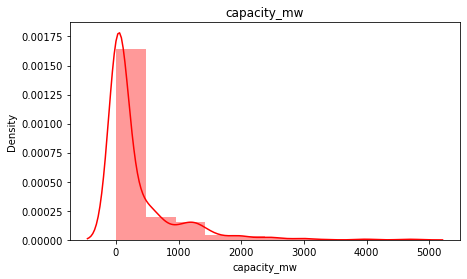

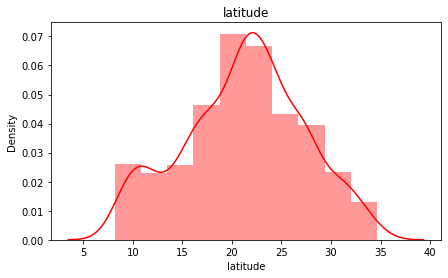

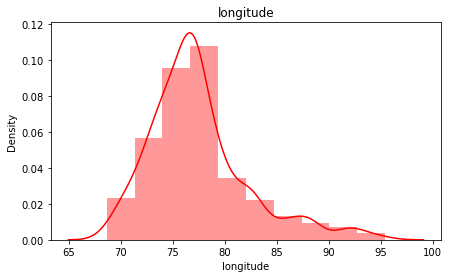

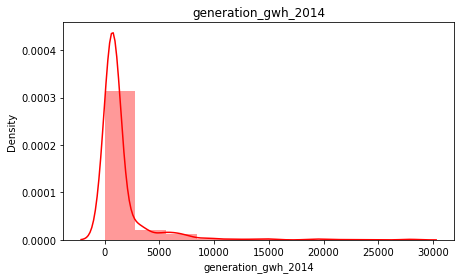

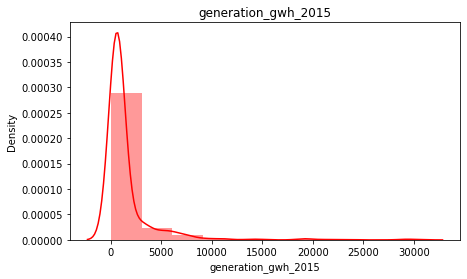

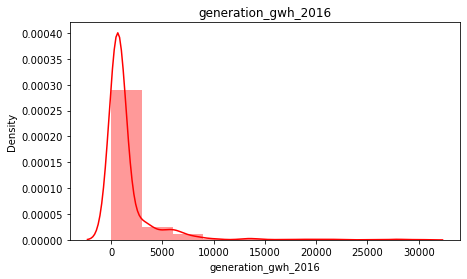

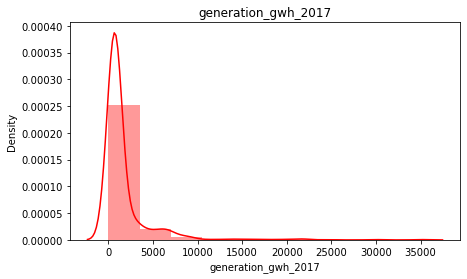

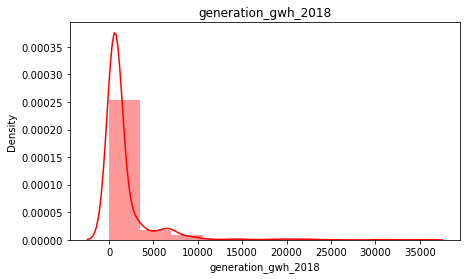

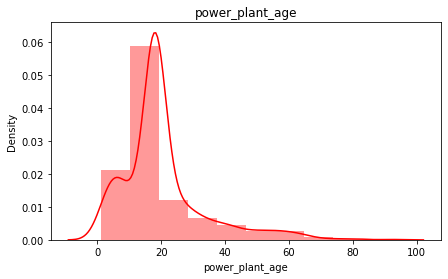

In [44]:
for i in df_gp[numerical]:              
    plt.figure(figsize = (7, 4))
    sns.distplot(df_gp[i], bins = 10, color="red")
    plt.title(i)
    plt.show()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:ylabel='primary_fuel'>

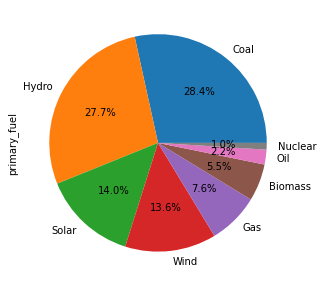

In [45]:
plt.figure(figsize=(10,5))
print(df_gp['primary_fuel'].value_counts())
df_gp['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:ylabel='geolocation_source'>

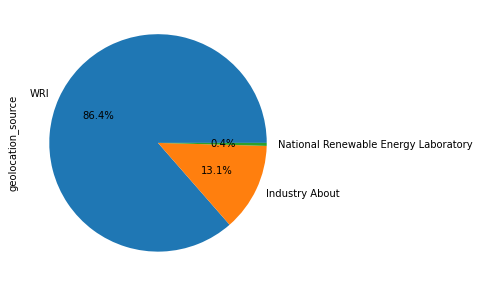

In [46]:
plt.figure(figsize=(10,5))
print(df_gp['geolocation_source'].value_counts())
df_gp['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

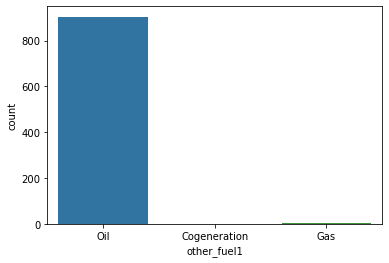

In [47]:
sns.countplot(df_gp['other_fuel1'])

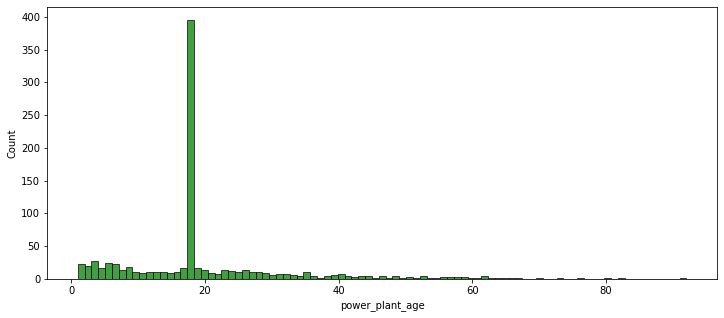

In [48]:
plt.figure(figsize=(12,5))
sns.histplot(df_gp['power_plant_age'],color='green')
plt.show();

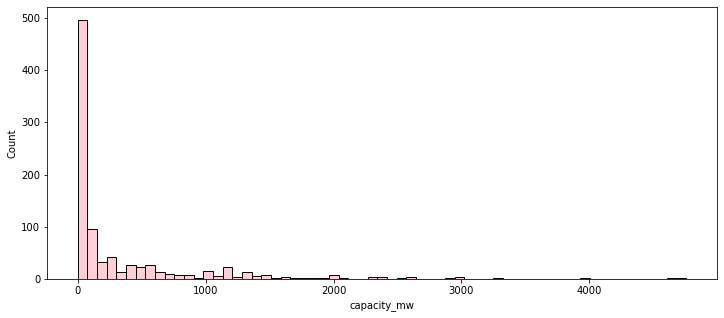

In [49]:
plt.figure(figsize=(12,5))
sns.histplot(df_gp['capacity_mw'],color='pink')
plt.show();

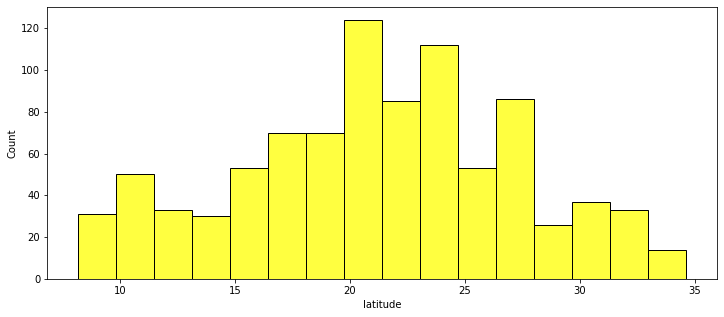

In [50]:
plt.figure(figsize=(12,5))
sns.histplot(df_gp['latitude'],color='yellow')
plt.show();

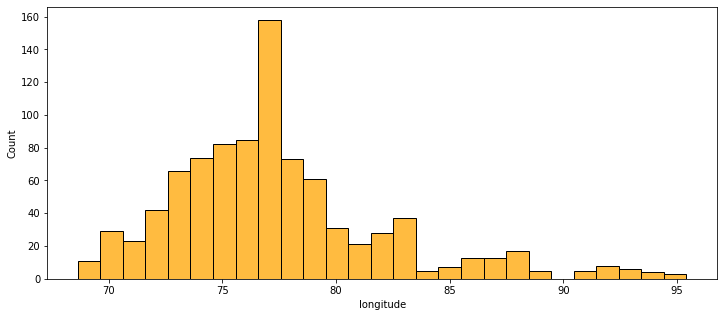

In [51]:
plt.figure(figsize=(12,5))
sns.histplot(df_gp['longitude'],color='orange')
plt.show();

# Bi-Variate Analysis

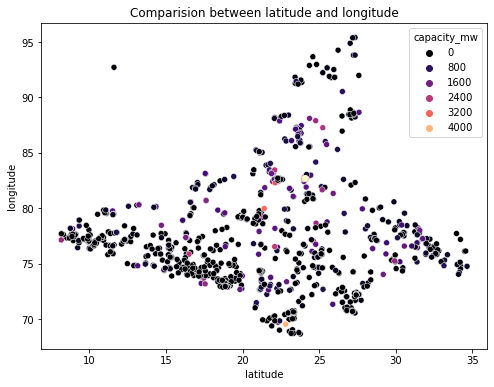

In [52]:
plt.figure(figsize=[8,6])
plt.title('Comparision between latitude and longitude')
sns.scatterplot(df_gp['latitude'],df_gp['longitude'],hue=df_gp['capacity_mw'],palette="magma");

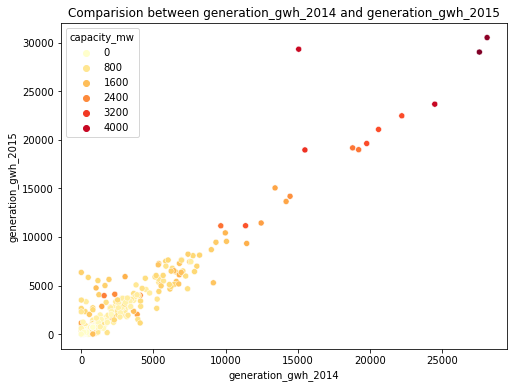

In [53]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2014 and generation_gwh_2015')
sns.scatterplot(df_gp['generation_gwh_2014'],df_gp['generation_gwh_2015'],hue=df_gp['capacity_mw'],palette="YlOrRd");

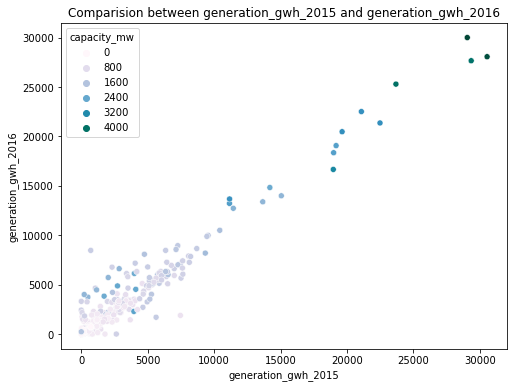

In [54]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2015 and generation_gwh_2016')
sns.scatterplot(df_gp['generation_gwh_2015'],df_gp['generation_gwh_2016'],hue=df_gp['capacity_mw'],palette="PuBuGn");

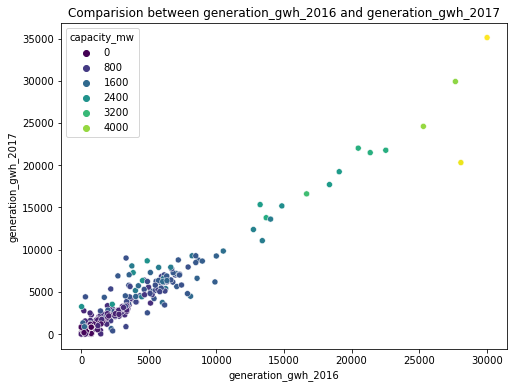

In [55]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2016 and generation_gwh_2017')
sns.scatterplot(df_gp['generation_gwh_2016'],df_gp['generation_gwh_2017'],hue=df_gp['capacity_mw'],palette="viridis");

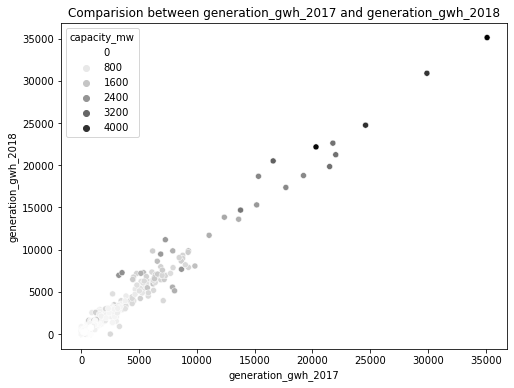

In [56]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2017 and generation_gwh_2018')
sns.scatterplot(df_gp['generation_gwh_2017'],df_gp['generation_gwh_2018'],hue=df_gp['capacity_mw'],palette="Greys");

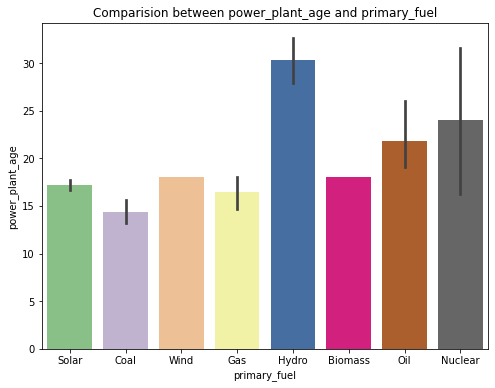

In [57]:
plt.figure(figsize=[8,6])
plt.title('Comparision between power_plant_age and primary_fuel')
sns.barplot(x = "primary_fuel", y = "power_plant_age", data = df_gp, palette="Accent")
plt.show()

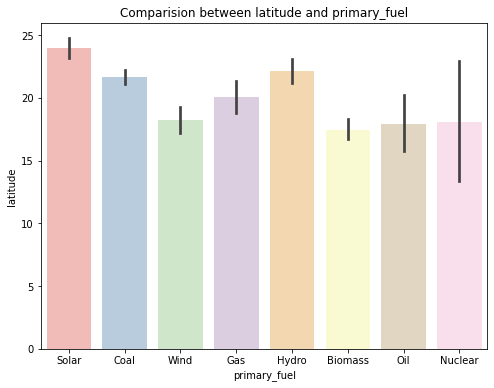

In [58]:
plt.figure(figsize=[8,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(x = "primary_fuel", y = "latitude", data = df_gp, palette="Pastel1")
plt.show()

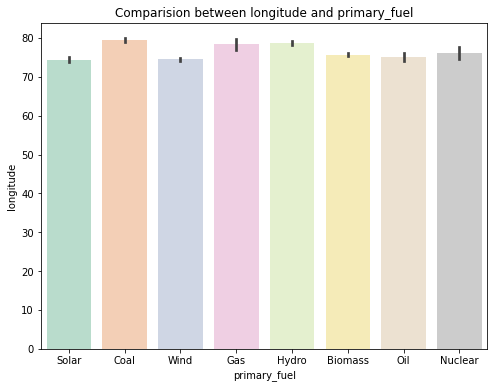

In [59]:
plt.figure(figsize=[8,6])
plt.title('Comparision between longitude and primary_fuel')
sns.barplot(x = "primary_fuel", y = "longitude", data = df_gp, palette="Pastel2")
plt.show()

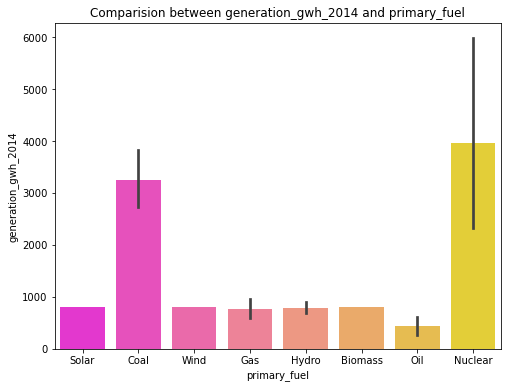

In [60]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2014 and primary_fuel')
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df_gp, palette="spring")
plt.show()

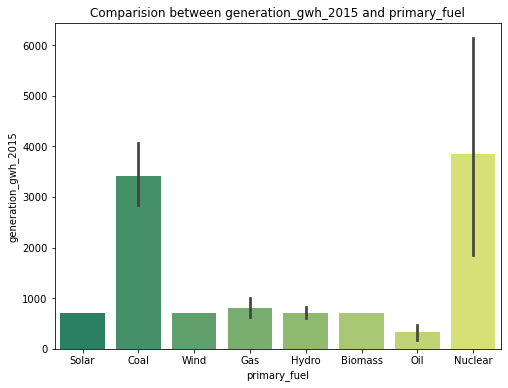

In [61]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2015 and primary_fuel')
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df_gp, palette="summer")
plt.show()

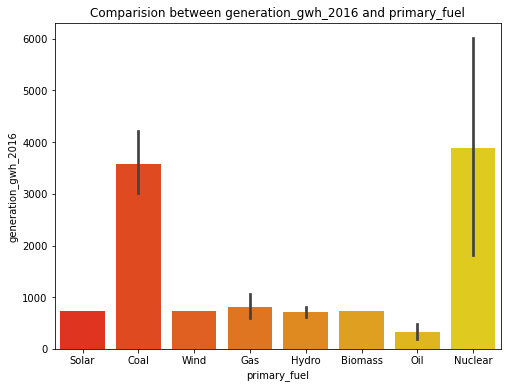

In [62]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2016 and primary_fuel')
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df_gp, palette="autumn")
plt.show()

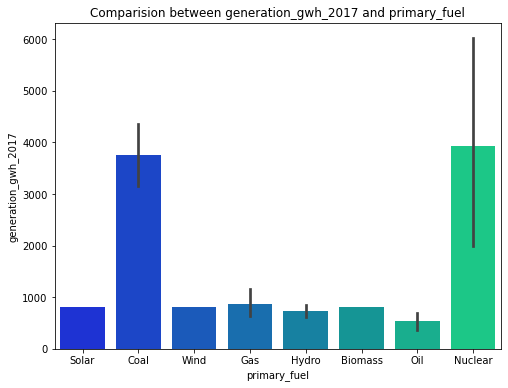

In [63]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2017 and primary_fuel')
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df_gp, palette="winter")
plt.show()

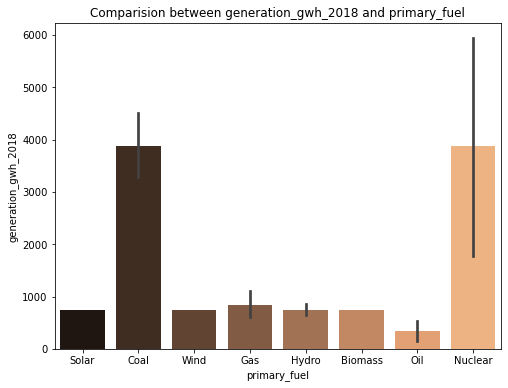

In [64]:
plt.figure(figsize=[8,6])
plt.title('Comparision between generation_gwh_2018 and primary_fuel')
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df_gp, palette="copper")
plt.show()

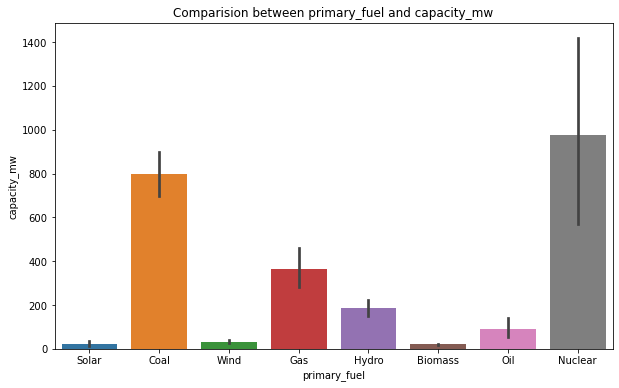

In [65]:
# Comparison between target variables
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df_gp)
plt.show()

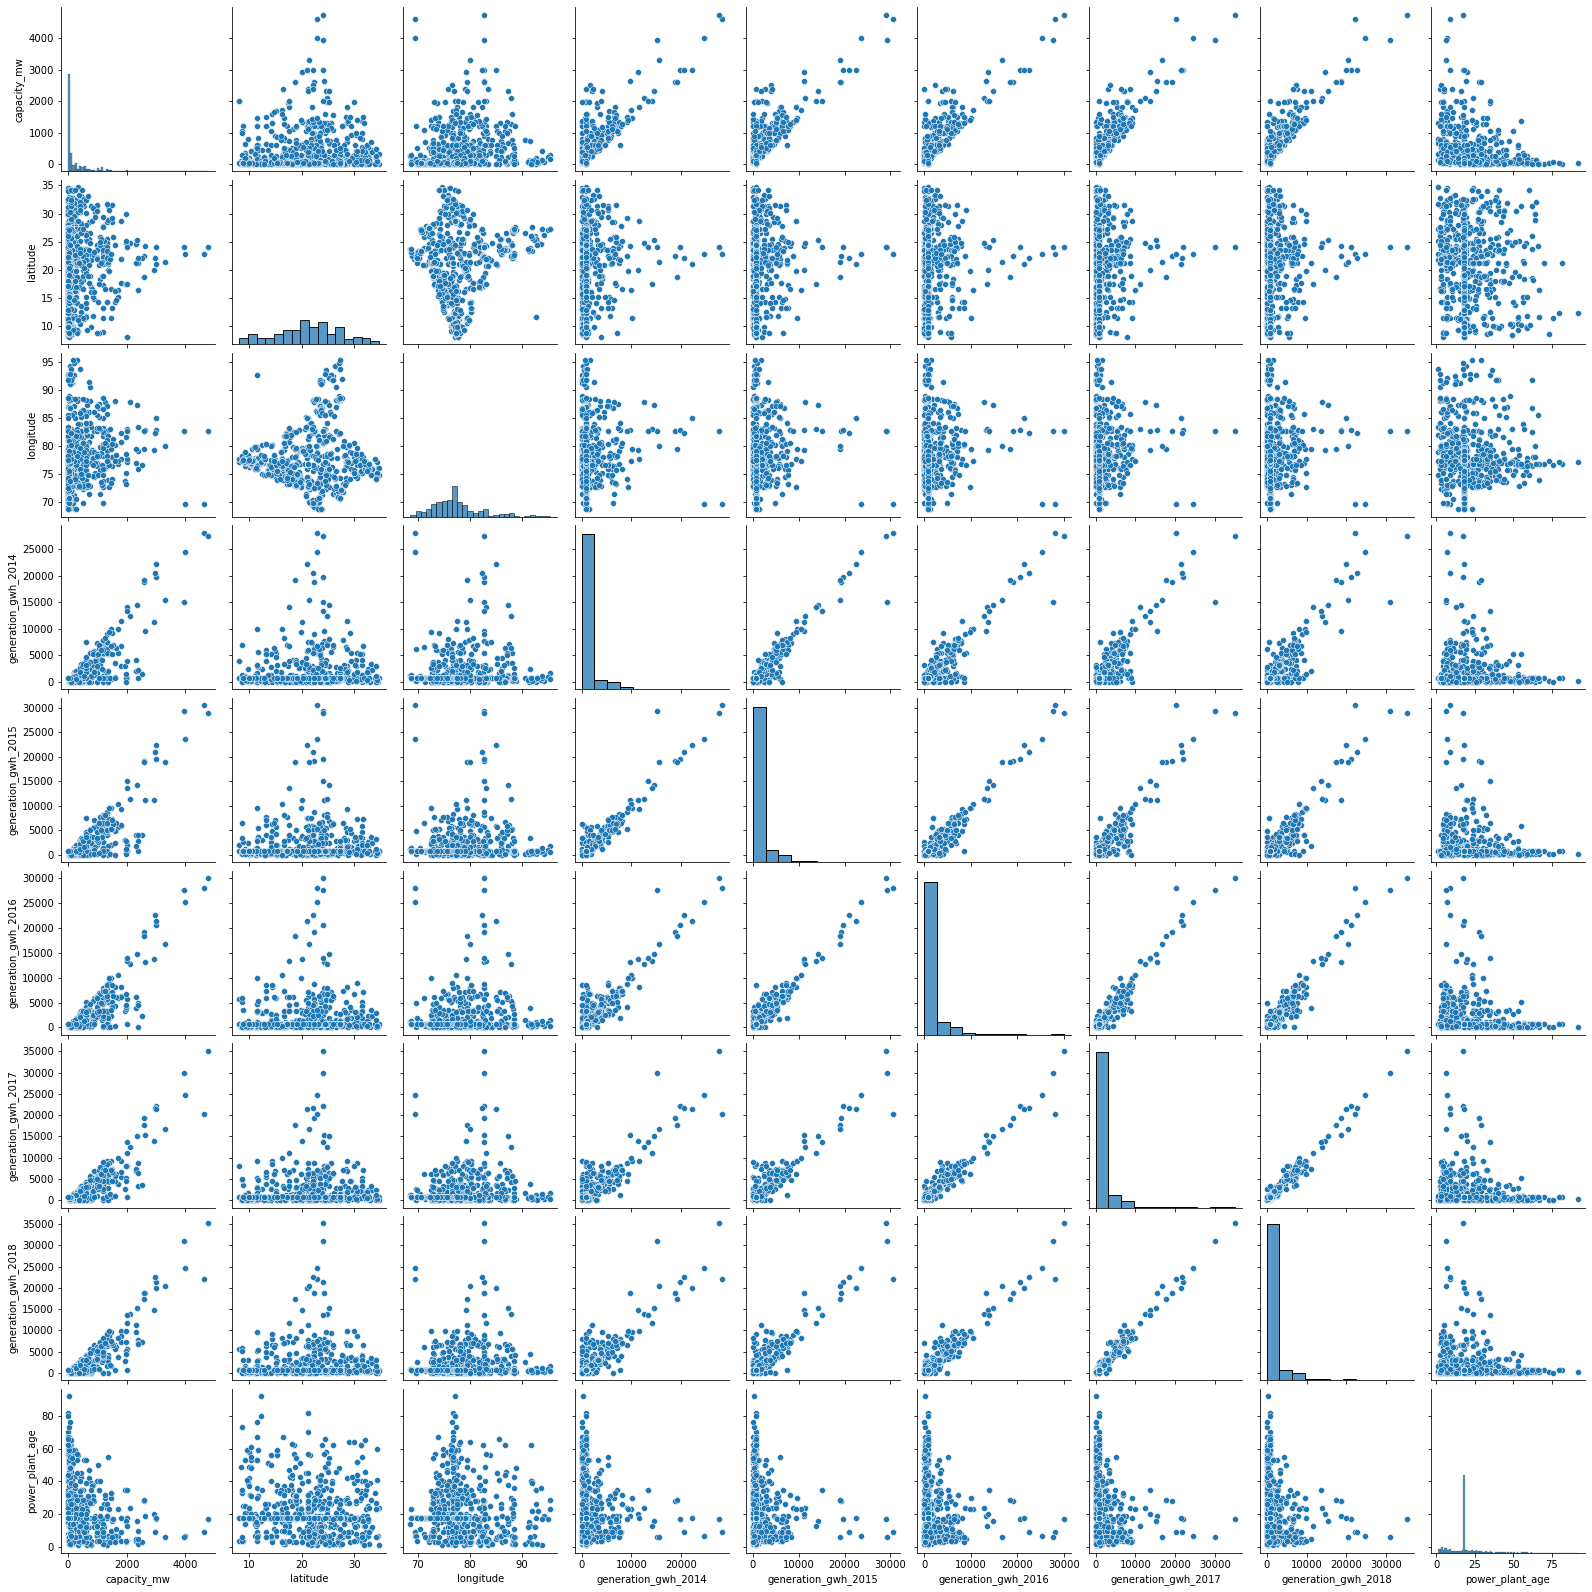

In [66]:
sns.pairplot(df_gp)

# Encoding The Data Frame

In [67]:
df_gp.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'power_plant_age'],
      dtype='object')

In [68]:
df_gp.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
power_plant_age        float64
dtype: object

Encoding the categorical columns using label encoder.

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
df_gp['primary_fuel'] = le.fit_transform(df_gp['primary_fuel'])
df_gp['other_fuel1'] = le.fit_transform(df_gp['other_fuel1'])
df_gp['source'] = le.fit_transform(df_gp['source'])
df_gp['geolocation_source'] = le.fit_transform(df_gp['geolocation_source'])

In [71]:
df_gp

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


# Outliers

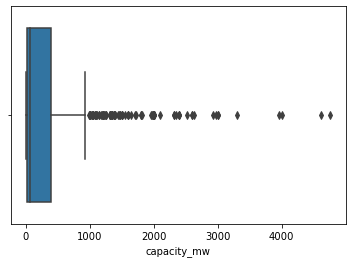

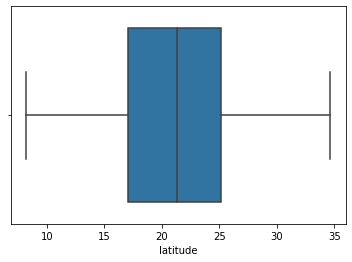

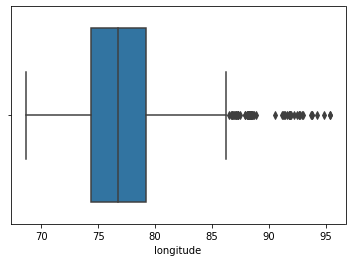

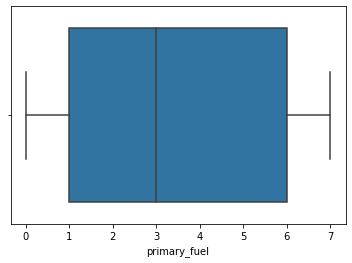

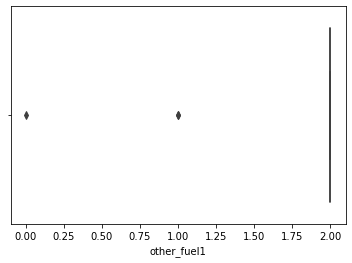

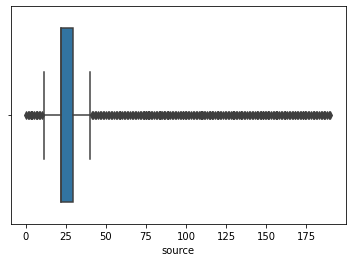

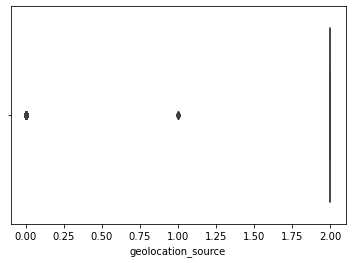

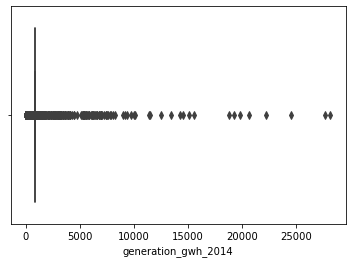

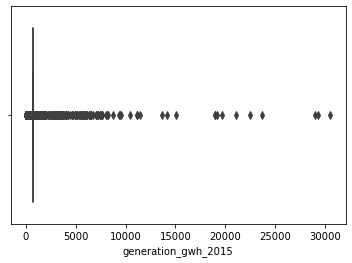

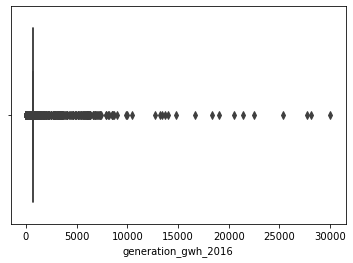

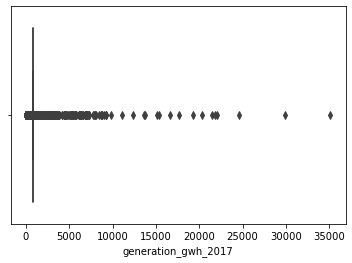

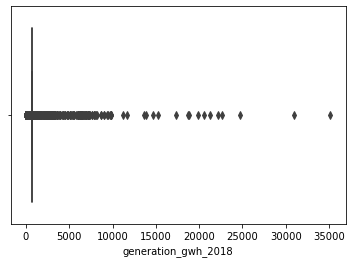

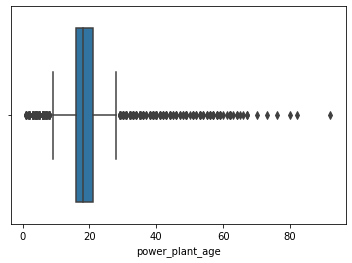

In [72]:
for i in df_gp.columns:
    sns.boxplot(df_gp[i])
    plt.show()

capacity_mw               AxesSubplot(0.125,0.536818;0.0596154x0.343182)
latitude               AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
longitude              AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
primary_fuel           AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
other_fuel1            AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
source                 AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
geolocation_source     AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
generation_gwh_2014    AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
generation_gwh_2015    AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
generation_gwh_2016    AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
generation_gwh_2017    AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
generation_gwh_2018          AxesSubplot(0.125,0.125;0.0596154x0.343182)
power_plant_age           AxesSubplot(0.196538,0.125;0.0596154x0.343182)
dtype: object

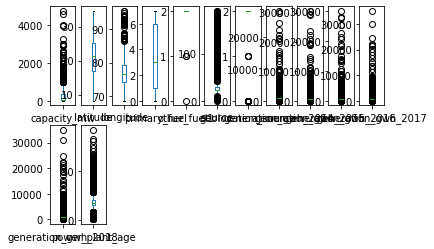

In [73]:
df_gp.plot(kind='box',subplots=True,layout=(2,11))

As seen above, there are a significant number of outliers present in this dataset in columns, `capacity_mw, longitude, other_fuel1, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018` & `power_plant_age`. 

# Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [74]:
df_outliers=df_gp[["capacity_mw", "longitude", "other_fuel1","geolocation_source","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","power_plant_age"]]

In [75]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_new_gp=df_gp[(z<3).all(axis=1)]
df_new_gp

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


In [76]:
df_new_gp.shape

(843, 13)

In [77]:
df_gp.shape

(907, 13)

In [78]:
Data_loss=((907-843)/907)*100
Data_loss

7.056229327453142

The data loss after z-score is `7.05 %`.

# Skewness

In [79]:
df_new_gp.skew()

capacity_mw            1.991256
latitude              -0.123310
longitude              0.945370
primary_fuel           0.406918
other_fuel1            0.000000
source                 1.719265
geolocation_source    -2.050764
generation_gwh_2014    2.960169
generation_gwh_2015    2.760026
generation_gwh_2016    2.696838
generation_gwh_2017    2.594170
generation_gwh_2018    2.659698
power_plant_age        1.287395
dtype: float64

In [80]:
df_skew=["capacity_mw", "longitude", "source","geolocation_source","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018","power_plant_age"]

We shall use Power Transformer to remove skewness.

In [81]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [82]:
df_new_gp[df_skew] = scal.fit_transform(df_new_gp[df_skew].values)

In [83]:
df_new_gp[df_skew].skew()

capacity_mw            0.016225
longitude              0.000090
source                -0.166906
geolocation_source    -2.024131
generation_gwh_2014    0.238132
generation_gwh_2015    0.174247
generation_gwh_2016    0.159215
generation_gwh_2017    0.133574
generation_gwh_2018    0.143115
power_plant_age        0.041060
dtype: float64

In [84]:
df_new_gp

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.675319,28.1839,-0.920092,6,2,1.519426,-2.222684,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,-1.106704
1,0.235796,24.7663,-0.498859,1,2,1.973212,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
2,-0.262335,21.9038,-2.372197,7,2,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
3,0.408376,23.8712,2.426851,2,2,-0.424808,0.411307,-0.265181,0.099035,0.109193,-0.193699,-0.191466,-0.254822
4,1.757789,21.9603,1.259639,1,2,-0.424808,0.411307,1.433055,2.305494,2.302956,2.019993,2.413793,-1.787382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.698369,16.2949,0.231387,1,2,-0.424808,0.411307,-0.039590,-2.486044,-0.851805,0.019432,-0.121955,-2.004612
903,-1.595547,12.8932,0.420685,6,2,1.150576,-2.437811,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
904,-0.496874,15.2758,-0.224021,7,2,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
905,0.125950,24.3500,-0.759073,1,2,0.848642,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479


In [85]:
df_new_gp[np.abs(df_new_gp)>0.25].all()

capacity_mw            True
latitude               True
longitude              True
primary_fuel           True
other_fuel1            True
source                 True
geolocation_source     True
generation_gwh_2014    True
generation_gwh_2015    True
generation_gwh_2016    True
generation_gwh_2017    True
generation_gwh_2018    True
power_plant_age        True
dtype: bool

# Correlation

In [86]:
df_new_gp.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
capacity_mw,1.000000,0.056894,0.344003,-0.524233,NaN,-0.330585,0.475328,0.308464,0.328390,0.356841,0.338501,0.349994,-0.239387
latitude,0.056894,1.000000,-0.072056,-0.002903,NaN,0.057553,-0.207214,0.105822,0.099836,0.117189,0.101145,0.108335,-0.107835
longitude,0.344003,-0.072056,1.000000,-0.411167,NaN,-0.198836,0.304124,0.029459,0.026719,0.081361,0.073004,0.093397,-0.135130
primary_fuel,-0.524233,-0.002903,-0.411167,1.000000,NaN,0.003953,-0.481036,-0.131428,-0.145569,-0.164930,-0.147595,-0.158518,0.136905
other_fuel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,-0.330585,0.057553,-0.198836,0.003953,NaN,1.000000,-0.396525,-0.016818,-0.019133,-0.018917,-0.011559,-0.021937,-0.010257
geolocation_source,0.475328,-0.207214,0.304124,-0.481036,NaN,-0.396525,1.000000,0.016284,0.018525,0.018316,0.011191,0.021239,0.000362
generation_gwh_2014,0.308464,0.105822,0.029459,-0.131428,NaN,-0.016818,0.016284,1.000000,0.839419,0.784173,0.716783,0.716370,-0.026196
generation_gwh_2015,0.328390,0.099836,0.026719,-0.145569,NaN,-0.019133,0.018525,0.839419,1.000000,0.879669,0.771466,0.767726,-0.085436
generation_gwh_2016,0.356841,0.117189,0.081361,-0.164930,NaN,-0.018917,0.018316,0.784173,0.879669,1.000000,0.902834,0.893294,-0.179224


In [87]:
df_new_gp.corr()['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
power_plant_age        0.136905
source                 0.003953
latitude              -0.002903
generation_gwh_2014   -0.131428
generation_gwh_2015   -0.145569
generation_gwh_2017   -0.147595
generation_gwh_2018   -0.158518
generation_gwh_2016   -0.164930
longitude             -0.411167
geolocation_source    -0.481036
capacity_mw           -0.524233
other_fuel1                 NaN
Name: primary_fuel, dtype: float64

In [88]:
df_new_gp.corr()['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
geolocation_source     0.475328
generation_gwh_2016    0.356841
generation_gwh_2018    0.349994
longitude              0.344003
generation_gwh_2017    0.338501
generation_gwh_2015    0.328390
generation_gwh_2014    0.308464
latitude               0.056894
power_plant_age       -0.239387
source                -0.330585
primary_fuel          -0.524233
other_fuel1                 NaN
Name: capacity_mw, dtype: float64

<AxesSubplot:>

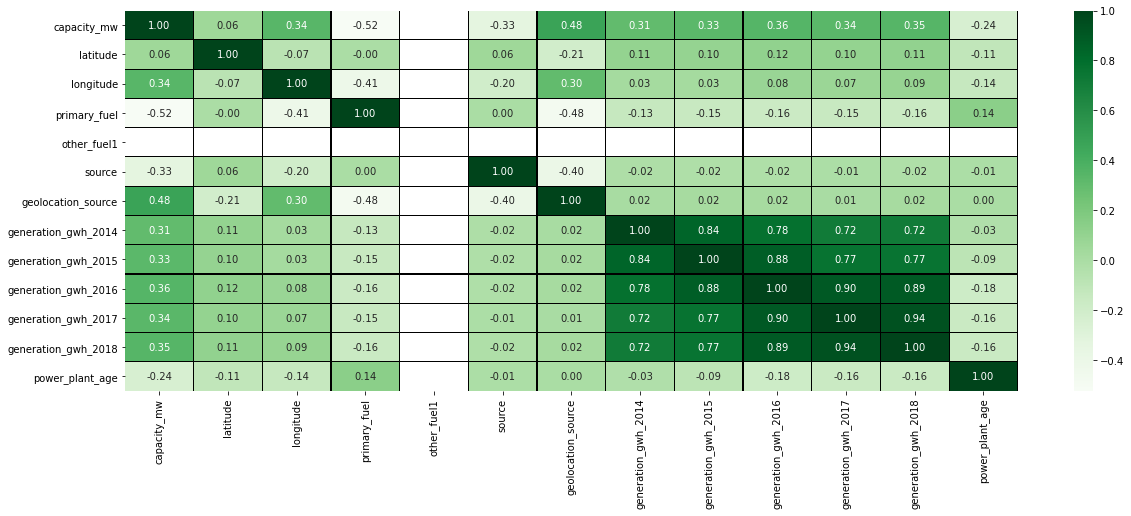

In [89]:
# Visualizing df_new_ce.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_new_gp.corr(),annot=True,cmap='Greens',linewidths=0.1,linecolor="black",fmt=".2f")

### Correlation between capacity_mw and other features

1.The label capacity_mw is highly positively correlated with the features generation_gwh_2018, generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014.  
2.And the label is negatively correlated with the features primary_fuel, source and Power_plant_age.  
3.The columns other_fuel1 and latitude have no relation with the label, so we can drop them.  

### Correlation between primary_fuel and other features

1.The target primary_fuel is less correlated with Power_plant_age and source.  
2.The target is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also, the features `other_fuel1` and `latitude` have very very less correlation with both the labels. Let's drop those columns.

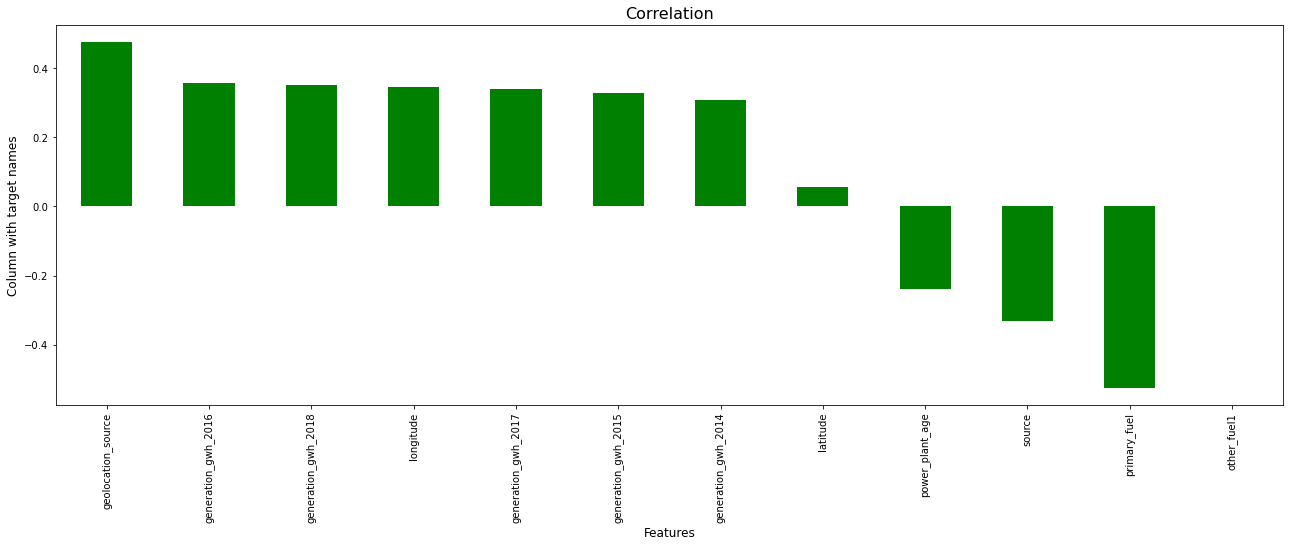

In [90]:
plt.figure(figsize=(22,7))
df_new_gp.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

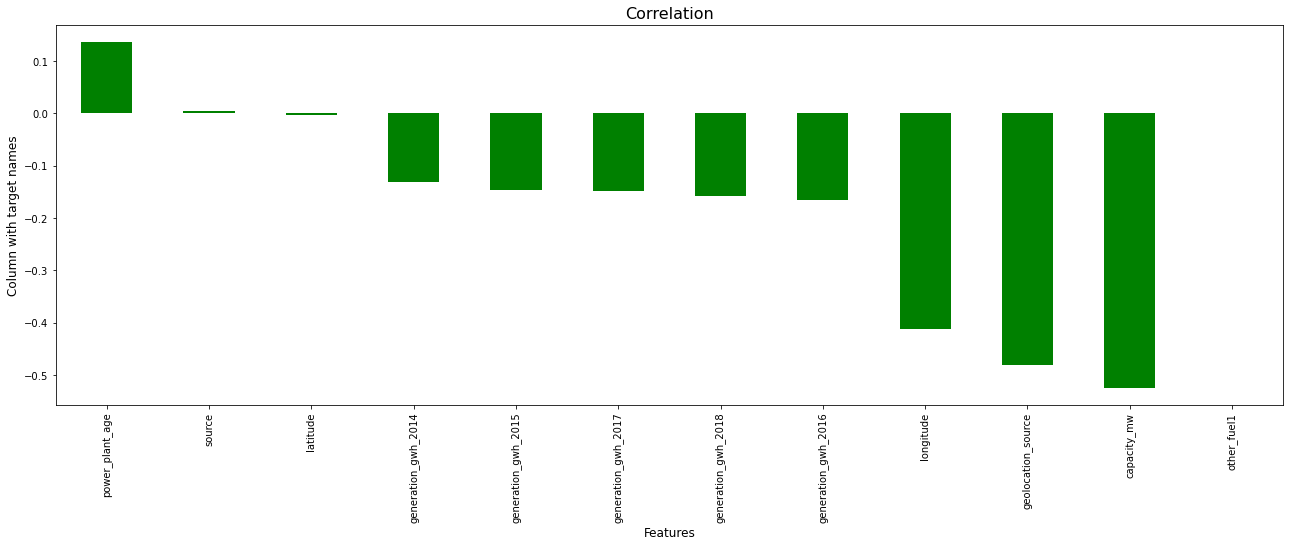

In [91]:
plt.figure(figsize=(22,7))
df_new_gp.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

From the above visualizations we can see that `latitude` & `other_fuel1` have very less correlation with both the targets capacity_mw and primary_fuel. Let's drop these columns.

In [92]:
df_new_gp.drop("other_fuel1",axis=1,inplace=True)
df_new_gp.drop("latitude",axis=1,inplace=True)

# Model Building (Regression : 'capacity_mw')

In [93]:
x = df_new_gp.drop("capacity_mw", axis=1)
y = df_new_gp["capacity_mw"]

In [94]:
x.shape

(843, 10)

In [95]:
y.shape

(843,)

# VIF

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,longitude,1.182658
1,primary_fuel,1.148588
2,source,1.221372
3,geolocation_source,1.359551
4,generation_gwh_2014,3.604252
5,generation_gwh_2015,6.161326
6,generation_gwh_2016,10.779929
7,generation_gwh_2017,10.208747
8,generation_gwh_2018,9.330088
9,power_plant_age,1.094356


All the VIF of the features are good.

# Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-0.920091,1.169529,1.519426,-2.222684,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,-1.106704
1,-0.498859,-0.980303,1.973212,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
2,-2.372197,1.599496,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
3,2.426851,-0.550337,-0.424808,0.411307,-0.265181,0.099035,0.109193,-0.193699,-0.191466,-0.254822
4,1.259639,-0.980303,-0.424808,0.411307,1.433055,2.305494,2.302956,2.019993,2.413793,-1.787382
...,...,...,...,...,...,...,...,...,...,...
838,0.231387,-0.980303,-0.424808,0.411307,-0.039590,-2.486044,-0.851805,0.019432,-0.121955,-2.004612
839,0.420685,1.169529,1.150576,-2.437811,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
840,-0.224021,1.599496,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
841,-0.759073,-0.980303,0.848642,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479


# Best Random State

In [98]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [99]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.7721106119930136  on Random State : 74


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [101]:
x_train.shape

(590, 10)

In [102]:
x_test.shape

(253, 10)

In [103]:
y_train.shape

(590,)

In [104]:
y_test.shape

(253,)

# Linear Regression

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [106]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.5383421572450036
Mean absolute error:  0.5468008074485288
Mean squared error:  0.44965520030811207
Root Mean squared error:  0.6705633454850571


# Lasso Regression

In [107]:
from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls=ls.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_ls))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_ls))
print('Mean squared error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2_Score:  -0.006666017664442414
Mean absolute error:  0.8303226492997519
Mean squared error:  0.9804937074501273
Root Mean squared error:  0.9901988221817511


# Ridge Regression

In [108]:
from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

pred_rd=rd.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rd))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rd))
print('Mean squared error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_Score:  0.5386141608076082
Mean absolute error:  0.5468354221129019
Mean squared error:  0.4493902685662455
Root Mean squared error:  0.6703657722215876


# Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.6575666954717314
Mean absolute error:  0.41220705532865165
Mean squared error:  0.3335303809006089
Root Mean squared error:  0.5775208921767323


# KNearest Neighbors Regressor

In [110]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.7721106119930136
Mean absolute error:  0.34696221220712364
Mean squared error:  0.22196449171287372
Root Mean squared error:  0.47113107699755247


# SVR

In [111]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.7622485775686773
Mean absolute error:  0.3640962093144825
Mean squared error:  0.2315701231000867
Root Mean squared error:  0.4812173345797995


# Random Forest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.815733495860059
Mean absolute error:  0.3060133172122097
Mean squared error:  0.17947575922173367
Root Mean squared error:  0.42364579452855855


# Gradient Boosting Regressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.8247434523049633
Mean absolute error:  0.2983261754704848
Mean squared error:  0.17070005263820906
Root Mean squared error:  0.41315862890445487


From the bove models, the highest R2 score belongsa to `Gradient Boosting Regressor`, followed by `Random Forest Regressor` & `Knearest Neighbors Regressor`. Next, `SVR model` & `Decision Tree Regressor`. Lastly, `Ridge Regression` & `Linear Regression`. 

`Lasso Regression` model has a negative R2 score.

# Cross Validation Score

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.48136360456615995


In [116]:
scr_ls=cross_val_score(ls,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ls.mean())

Cross validation score of this model is:  -0.007423133986205643


In [117]:
scr_rd=cross_val_score(rd,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rd.mean())

Cross validation score of this model is:  0.4815255438276106


In [118]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.6077265451754692


In [119]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.6894535780950622


In [120]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.7125512333654456


In [121]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.7710110713487612


In [122]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.7888486884488991


We can see that the highest cross validation score belongs to `Gradient Boosting Regressor`, followed by `Random Forest Regressor` & `SVR model`.

The lowest cross validation scores belong to `Lasso Regression`, `Ridge Regression` & `Linear Regresion` models.

# Hyper Parameter Tuning

Since the R2 scores and Cross Validation Scores of `Random Forest Regressor` are the highest we shall consider that for hyper parameter tuning.

We shall use GridSearchCV for hyper parameter tuning.

In [123]:
from sklearn.model_selection import GridSearchCV

In [150]:
parameters_rfr = {'criterion':['squared_error', 'absolute_error','poisson'],
                  'max_features':['sqrt', 'log2'],
                  'n_estimators':[5,10,50,100],
                  'max_depth':[2,3,4,5],
                  'min_samples_leaf':[1,2,3,4]}
grid_rfr=GridSearchCV(rfr, param_grid = parameters_rfr, cv = 4)

In [151]:
grid_rfr.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [5, 10, 50, 100]})

In [152]:
grid_rfr.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 50}

In [153]:
cap_model = RandomForestRegressor(criterion='squared_error',max_features='log2',max_depth=5,min_samples_leaf=2,n_estimators=50)
cap_model.fit(x_train,y_train)

pred_cap = cap_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_cap))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_cap))
print('Mean squared error: ',mean_squared_error(y_test,pred_cap))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_cap)))

R2_Score:  0.8253958797928596
Mean absolute error:  0.3098019876404322
Mean squared error:  0.17006458761284354
Root Mean squared error:  0.4123888791090802


After hyper parameter tuning, we have achieved a R2 score if `82.53 %`, with the Random Forest Regressor Model.

# Saving the Model

In [154]:
import joblib
joblib.dump(cap_model,"GPPD_capacity_mw.pkl")

['GPPD_capacity_mw.pkl']

# Prediction

In [155]:
# Loading the saved model
GPPDP_Regression_Model=joblib.load("GPPD_capacity_mw.pkl")

# Prediction
prediction = GPPDP_Regression_Model.predict(x_test)
prediction

array([ 1.28730713,  0.80534978,  0.43654548,  1.07705471, -0.41563271,
       -0.47277613,  1.57614317, -0.33946039, -0.64733976, -0.37794188,
        0.96493394, -0.57934691,  1.0242959 ,  0.15817577, -0.58412785,
        0.53075239, -0.81607544,  0.94142605, -0.57934691,  1.20603751,
       -0.36938398, -0.84462561, -0.4430516 , -0.79331168, -0.79331168,
        0.73775889,  1.03949987,  0.28414676,  0.32884328,  0.65647188,
        0.2703543 ,  1.59785133,  1.04531146,  1.59237471,  0.4442413 ,
        0.90447935, -0.57934691,  1.60468204, -0.42986963,  1.04829271,
       -1.00978676, -1.11468568, -0.79331168,  0.92878592,  0.92461787,
       -0.59057588,  0.17059995, -1.01845175,  1.17232393,  0.5854853 ,
       -0.45288355, -0.97025443, -0.39735625, -0.40526292, -0.79331168,
        0.98395649, -1.0677094 ,  0.30864839, -0.40236631,  1.59227667,
       -0.41563271,  1.46322504,  0.02952811,  1.56862404, -0.59057588,
       -0.65292121,  0.24837152, -0.61243856,  1.58058002, -0.34

In [156]:
pd.DataFrame([GPPDP_Regression_Model.predict(x_test)[:],y_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
Predictions,1.287307,0.805350,0.436545,1.077055,-0.415633,-0.472776,1.576143,-0.339460,-0.647340,-0.377942,...,1.390697,-0.612439,-1.031447,0.547129,-0.415633,1.182570,-0.459288,0.915594,-0.982398,-0.753496
Original Values,1.454234,1.698369,0.914798,1.196234,-0.628973,-0.784473,1.805735,-0.784473,-1.512367,-0.784473,...,1.221520,-0.140622,-1.767774,0.345036,-0.892130,1.000385,-0.529884,0.583378,-1.355112,-0.529884


# Model Building (Classification: 'primary_fuel')

In [93]:
df_new_gp

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.675319,-0.920092,6,1.519426,-2.222684,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,-1.106704
1,0.235796,-0.498859,1,1.973212,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
2,-0.262335,-2.372197,7,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
3,0.408376,2.426851,2,-0.424808,0.411307,-0.265181,0.099035,0.109193,-0.193699,-0.191466,-0.254822
4,1.757789,1.259639,1,-0.424808,0.411307,1.433055,2.305494,2.302956,2.019993,2.413793,-1.787382
...,...,...,...,...,...,...,...,...,...,...,...
902,1.698369,0.231387,1,-0.424808,0.411307,-0.039590,-2.486044,-0.851805,0.019432,-0.121955,-2.004612
903,-1.595547,0.420685,6,1.150576,-2.437811,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
904,-0.496874,-0.224021,7,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
905,0.125950,-0.759073,1,0.848642,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479


In [94]:
x1 = df_new_gp.drop("primary_fuel",axis=1)
y1 = df_new_gp["primary_fuel"]

In [95]:
x1.shape

(843, 10)

In [96]:
y1.shape

(843,)

# VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,capacity_mw,1.773969
1,longitude,1.194954
2,source,1.237917
3,geolocation_source,1.498514
4,generation_gwh_2014,3.620970
5,generation_gwh_2015,6.176319
6,generation_gwh_2016,10.779818
7,generation_gwh_2017,10.212168
8,generation_gwh_2018,9.348065
9,power_plant_age,1.152138


All the VIF of the features are good.

# Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

scale1 = StandardScaler()
x1 = pd.DataFrame(scale1.fit_transform(x1), columns=x1.columns)
x1

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.675319,-0.920091,1.519426,-2.222684,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,-1.106704
1,0.235796,-0.498859,1.973212,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
2,-0.262335,-2.372197,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
3,0.408376,2.426851,-0.424808,0.411307,-0.265181,0.099035,0.109193,-0.193699,-0.191466,-0.254822
4,1.757789,1.259639,-0.424808,0.411307,1.433055,2.305494,2.302956,2.019993,2.413793,-1.787382
...,...,...,...,...,...,...,...,...,...,...
838,1.698369,0.231387,-0.424808,0.411307,-0.039590,-2.486044,-0.851805,0.019432,-0.121955,-2.004612
839,-1.595547,0.420685,1.150576,-2.437811,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
840,-0.496874,-0.224021,-0.490980,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479
841,0.125950,-0.759073,0.848642,0.411307,-0.039590,-0.045039,-0.044532,-0.027209,-0.051639,0.042479


# SMOTE

In [99]:
y1.value_counts()

1    232
3    220
6    126
7    123
2     65
0     50
5     18
4      9
Name: primary_fuel, dtype: int64

In [100]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE()
x1 , y1 = sm1.fit_resample(x1,y1)

In [101]:
y1.value_counts()

0    232
1    232
2    232
3    232
4    232
5    232
6    232
7    232
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

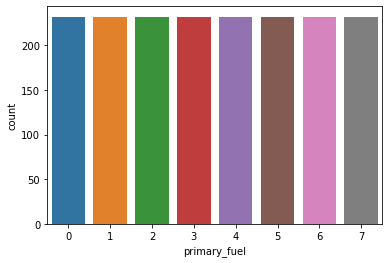

In [102]:
# Visualizing the data after oversampling
sns.countplot(y1)

We have balanced the data using SMOTE.

# Best Random State

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [104]:
maxAccu1=0
maxRS1=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = i)
    lgr=LogisticRegression()
    lgr.fit(x1_train,y1_train)
    pred_rs=lgr.predict(x1_test)
    acc=accuracy_score(y1_test,pred_rs)
    if acc>maxAccu1:
        maxAccu1=acc
        maxRS1=i
print("Best accuracy is :",maxAccu1," on Random State :",maxRS1)

Best accuracy is : 0.7648114901256733  on Random State : 51


In [105]:
# dividing the dataset for training and testing
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = maxRS1)

In [106]:
x1_train.shape

(1299, 10)

In [107]:
y1_train.shape

(1299,)

In [108]:
x1_test.shape

(557, 10)

In [109]:
y1_test.shape

(557,)

In [110]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x1_train = sc1.fit_transform(x1_train)
x1_test = sc1.fit_transform(x1_test)

# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [112]:
lg=LogisticRegression()
lg.fit(x1_train, y1_train)
lg.score(x1_train, y1_train)
pred_lg=lg.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_lg))
print(confusion_matrix(y1_test,pred_lg))
print(classification_report(y1_test,pred_lg))

accuracy score:  0.7414721723518851
[[67  0  0  0  0  1  0  7]
 [ 5 28  4  1 13  0  0  5]
 [ 0  8 30 13  7  4  0  3]
 [ 0 14  6 29  5  1  0 13]
 [ 0  9  0  4 63  0  0  0]
 [ 0  4  0  0  0 63  0  8]
 [ 2  2  0  0  0  0 74  0]
 [ 0  0  0  5  0  0  0 59]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        75
           1       0.43      0.50      0.46        56
           2       0.75      0.46      0.57        65
           3       0.56      0.43      0.48        68
           4       0.72      0.83      0.77        76
           5       0.91      0.84      0.87        75
           6       1.00      0.95      0.97        78
           7       0.62      0.92      0.74        64

    accuracy                           0.74       557
   macro avg       0.74      0.73      0.72       557
weighted avg       0.75      0.74      0.74       557



# Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
dtc.score(x1_train,y1_train)
pred_dtc=dtc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_dtc))
print(confusion_matrix(y1_test,pred_dtc))
print(classification_report(y1_test,pred_dtc))

accuracy score:  0.8258527827648114
[[71  3  0  0  0  1  0  0]
 [ 1 40  7  3  2  3  0  0]
 [ 0  9 48  6  0  2  0  0]
 [ 0  8  7 38  3 12  0  0]
 [ 0  7  5  4 60  0  0  0]
 [ 2  3  7  0  0 62  0  1]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.57      0.71      0.63        56
           2       0.65      0.74      0.69        65
           3       0.75      0.56      0.64        68
           4       0.92      0.79      0.85        76
           5       0.78      0.83      0.80        75
           6       1.00      0.99      0.99        78
           7       0.98      1.00      0.99        64

    accuracy                           0.83       557
   macro avg       0.82      0.82      0.82       557
weighted avg       0.84      0.83      0.83       557



# KNearest Neighbors Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knc=KNeighborsClassifier(n_neighbors = 5)
knc.fit(x1_train,y1_train)
knc.score(x1_train,y1_train)
pred_knc=knc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_knc))
print(confusion_matrix(y1_test,pred_knc))
print(classification_report(y1_test,pred_knc))

accuracy score:  0.9012567324955116
[[74  0  0  0  0  1  0  0]
 [ 4 37  6  1  4  4  0  0]
 [ 0  7 54  1  1  2  0  0]
 [ 0  3 10 49  1  0  0  5]
 [ 0  1  0  1 74  0  0  0]
 [ 2  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  1  0 63]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.95        75
           1       0.77      0.66      0.71        56
           2       0.77      0.83      0.80        65
           3       0.94      0.72      0.82        68
           4       0.93      0.97      0.95        76
           5       0.90      0.97      0.94        75
           6       1.00      1.00      1.00        78
           7       0.93      0.98      0.95        64

    accuracy                           0.90       557
   macro avg       0.90      0.89      0.89       557
weighted avg       0.90      0.90      0.90       557



# Support Vector Machine

In [117]:
from sklearn.svm import SVC

In [118]:
svc = SVC()
svc.fit(x1_train, y1_train)
svc.score(x1_train, y1_train)
svc_pred = svc.predict(x1_test)
print("accuracy score: ",accuracy_score(y1_test,svc_pred))
print(confusion_matrix(y1_test,svc_pred))
print(classification_report(y1_test,svc_pred))

accuracy score:  0.8456014362657092
[[72  0  0  0  0  1  0  2]
 [ 6 38  3  2  3  3  0  1]
 [ 0 10 43  1  2  6  0  3]
 [ 0  9 13 38  1  0  0  7]
 [ 0  0  0  1 75  0  0  0]
 [ 3  2  0  0  0 63  0  7]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.64      0.68      0.66        56
           2       0.73      0.66      0.69        65
           3       0.90      0.56      0.69        68
           4       0.93      0.99      0.96        76
           5       0.86      0.84      0.85        75
           6       1.00      1.00      1.00        78
           7       0.76      1.00      0.86        64

    accuracy                           0.85       557
   macro avg       0.84      0.84      0.83       557
weighted avg       0.85      0.85      0.84       557



# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
rfc.score(x1_train,y1_train)
pred_rfc=rfc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_rfc))
print(confusion_matrix(y1_test,pred_rfc))
print(classification_report(y1_test,pred_rfc))

accuracy score:  0.8976660682226212
[[74  0  1  0  0  0  0  0]
 [ 1 37 13  2  3  0  0  0]
 [ 0  4 58  2  0  1  0  0]
 [ 0  3  7 56  2  0  0  0]
 [ 0  0  0  2 74  0  0  0]
 [ 2  0 12  0  0 60  0  1]
 [ 1  0  0  0  0  0 77  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.84      0.66      0.74        56
           2       0.64      0.89      0.74        65
           3       0.90      0.82      0.86        68
           4       0.94      0.97      0.95        76
           5       0.98      0.80      0.88        75
           6       1.00      0.99      0.99        78
           7       0.98      1.00      0.99        64

    accuracy                           0.90       557
   macro avg       0.90      0.89      0.89       557
weighted avg       0.91      0.90      0.90       557



# GaussianNB Classifier

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
gnb=GaussianNB()
gnb.fit(x1_train,y1_train)
gnb.score(x1_train,y1_train)
pred_gnb=gnb.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_gnb))
print(confusion_matrix(y1_test,pred_gnb))
print(classification_report(y1_test,pred_gnb))

accuracy score:  0.5008976660682226
[[ 0  0  2  0  0 73  0  0]
 [ 0 23  9  0 14 10  0  0]
 [ 0  3 46  0  8  8  0  0]
 [ 0 23 31  0  7  7  0  0]
 [ 0  3 10  0 63  0  0  0]
 [ 0  0  2  0  0 73  0  0]
 [ 0  4  0  0  0  0 74  0]
 [ 0 10 33  0  0 21  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.35      0.41      0.38        56
           2       0.35      0.71      0.46        65
           3       0.00      0.00      0.00        68
           4       0.68      0.83      0.75        76
           5       0.38      0.97      0.55        75
           6       1.00      0.95      0.97        78
           7       0.00      0.00      0.00        64

    accuracy                           0.50       557
   macro avg       0.34      0.48      0.39       557
weighted avg       0.36      0.50      0.40       557



# Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
gbc.score(x1_train,y1_train)
pred_gcb=gbc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_gcb))
print(confusion_matrix(y1_test,pred_gcb))
print(classification_report(y1_test,pred_gcb))

accuracy score:  0.8833034111310593
[[75  0  0  0  0  0  0  0]
 [ 3 34 11  2  4  2  0  0]
 [ 0  8 54  1  1  1  0  0]
 [ 0  6  9 51  1  1  0  0]
 [ 0  1  0  1 74  0  0  0]
 [ 0  0 11  1  0 62  0  1]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       0.69      0.61      0.65        56
           2       0.64      0.83      0.72        65
           3       0.91      0.75      0.82        68
           4       0.93      0.97      0.95        76
           5       0.94      0.83      0.88        75
           6       1.00      1.00      1.00        78
           7       0.98      1.00      0.99        64

    accuracy                           0.88       557
   macro avg       0.88      0.87      0.87       557
weighted avg       0.89      0.88      0.88       557



From the above models, the highest Accuracy score belongs to `KNearest Neighbors Classifier`, followed by`Random Forest Classifier`, followed by `Gradient Boosting Classifier` & `SVC model`.

The lowest accuracy score belongs to `GaussianNB Classifier`.

# Cross Validation Score

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
scr_lg=cross_val_score(lg,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7187447468336087


In [127]:
scr_dtc=cross_val_score(dtc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.8712430803118568


In [128]:
scr_knc=cross_val_score(knc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_knc.mean())

Cross validation score of this model is:  0.8588456076283222


In [129]:
scr_svc=cross_val_score(svc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8141176129611918


In [130]:
scr_rfc=cross_val_score(rfc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.9154131524794945


In [131]:
scr_gnb=cross_val_score(gnb,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.5953656203808364


In [132]:
scr_gbc=cross_val_score(gbc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.9057241399298611


The highest cross validation score belongs to `Random Forest Classifier`, followed by `Gradient BoostingClassifier`, `Decision Tree Classifier` & `KNearest Neighbors Classifier`, next, `SVC model` and `Logistic Regression` model and lastly,`GaussianNB Classifier`.

# Hyper Parameter Tuning

Since the Accuracy Score of `KNearest Neighbors Classifier` is the highest, we shall consider this for hyper parameter tuning.

GridSearchCV is used for hyper parameter tuning.

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameters_knc = {'n_neighbors':[1,2,3,4,5,6],
                  'weights':['uniform','distance'],
                  'leaf_size':[10,100],
                  'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knc=GridSearchCV(knc, param_grid = parameters_knc, cv = 5)

In [150]:
grid_knc.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [151]:
grid_knc.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [152]:
knc1=KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=1,weights='uniform')

knc1.fit(x1_train,y1_train)
pred_kn1=knc1.predict(x1_test)
print("accuracy score: ",accuracy_score(y1_test,pred_kn1))
print(confusion_matrix(y1_test,pred_kn1))
print(classification_report(y1_test,pred_kn1))

accuracy score:  0.9174147217235189
[[74  0  1  0  0  0  0  0]
 [ 3 38  5  5  2  3  0  0]
 [ 0  1 62  1  0  1  0  0]
 [ 0  8  8 48  2  0  0  2]
 [ 0  0  0  1 75  0  0  0]
 [ 2  0  0  0  0 73  0  0]
 [ 0  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  1  0 63]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.81      0.68      0.74        56
           2       0.82      0.95      0.88        65
           3       0.87      0.71      0.78        68
           4       0.95      0.99      0.97        76
           5       0.94      0.97      0.95        75
           6       1.00      1.00      1.00        78
           7       0.97      0.98      0.98        64

    accuracy                           0.92       557
   macro avg       0.91      0.91      0.91       557
weighted avg       0.92      0.92      0.91       557



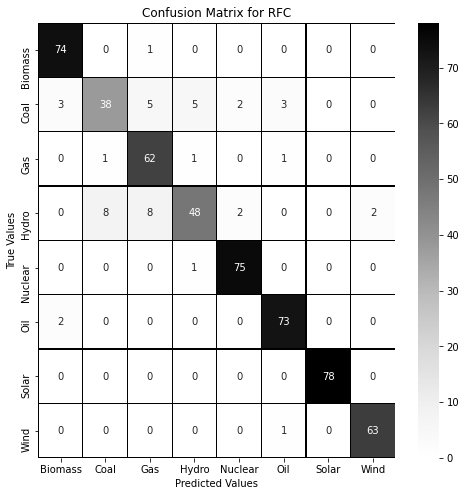

In [153]:
cm = confusion_matrix(y1_test, pred_kn1)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greys",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix for RFC')
plt.show()

# Saving the Model

`KNearest Neighbors Classifier` is our best model with accuracy of `91.74 %`.

In [156]:
import joblib
joblib.dump(knc1,"GPPD_primary_fuel.pkl")

['GPPD_primary_fuel.pkl']

# Prediction

In [157]:
# Loading the saved model
GPPD_Classification_model=joblib.load("GPPD_primary_fuel.pkl")

#Prediction
predictions = GPPD_Classification_model.predict(x1_test)
predictions

array([4, 0, 3, 1, 5, 6, 2, 5, 4, 6, 4, 0, 4, 1, 0, 0, 1, 1, 5, 2, 4, 7,
       6, 7, 3, 0, 3, 7, 5, 2, 6, 7, 6, 7, 6, 5, 1, 4, 5, 5, 1, 1, 0, 2,
       2, 0, 2, 2, 7, 7, 5, 2, 4, 1, 0, 2, 4, 5, 3, 7, 4, 0, 6, 4, 2, 5,
       4, 7, 0, 2, 7, 2, 5, 2, 7, 6, 6, 4, 4, 1, 7, 4, 4, 7, 4, 4, 4, 4,
       4, 6, 3, 3, 0, 4, 7, 3, 5, 2, 7, 2, 0, 5, 6, 3, 2, 6, 7, 7, 1, 1,
       5, 0, 7, 4, 0, 2, 0, 4, 0, 1, 6, 2, 5, 2, 6, 0, 1, 2, 2, 5, 2, 2,
       0, 1, 3, 7, 3, 5, 6, 6, 6, 3, 7, 5, 4, 5, 2, 1, 7, 6, 7, 6, 3, 5,
       5, 0, 2, 0, 1, 0, 5, 5, 7, 0, 3, 4, 4, 4, 6, 0, 4, 0, 5, 3, 7, 5,
       6, 0, 4, 5, 2, 0, 4, 2, 7, 4, 4, 6, 7, 5, 2, 1, 4, 6, 2, 1, 0, 4,
       1, 0, 5, 3, 6, 4, 3, 0, 2, 6, 2, 0, 5, 6, 6, 2, 6, 7, 5, 6, 5, 2,
       3, 4, 4, 0, 4, 6, 0, 0, 6, 4, 2, 4, 3, 3, 6, 7, 2, 3, 5, 7, 5, 7,
       2, 3, 2, 3, 7, 5, 6, 3, 6, 4, 2, 5, 5, 7, 4, 6, 0, 4, 2, 5, 5, 6,
       3, 1, 2, 6, 6, 1, 2, 1, 5, 6, 0, 7, 0, 4, 7, 2, 3, 4, 5, 5, 3, 0,
       7, 1, 7, 6, 0, 5, 6, 4, 6, 4, 6, 7, 7, 7, 2,

In [158]:
pd.DataFrame([GPPD_Classification_model.predict(x1_test)[:],y1_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,556
Predicted Value,4,0,3,1,5,6,2,5,4,6,...,5,2,5,0,4,0,1,1,4,2
Actual Value,3,0,3,3,5,6,2,5,4,6,...,5,2,5,0,4,0,1,1,4,2
